In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
X, y = make_moons(100, noise=0.25,random_state=2)

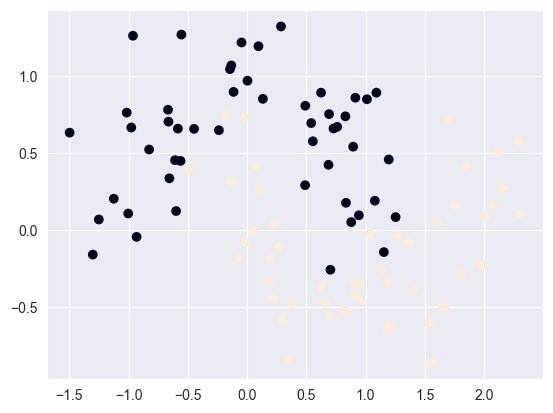

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [9]:
model1 = Sequential()

model1.add(Dense(128, input_dim=2, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.summary

<bound method Model.summary of <Sequential name=sequential_3, built=True>>

In [11]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 5s 554us/step


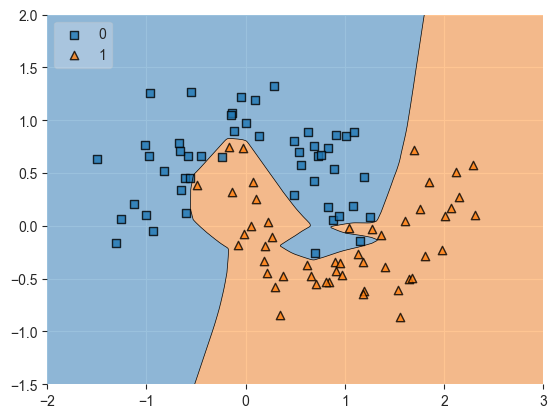

In [14]:
plot_decision_regions(X,y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

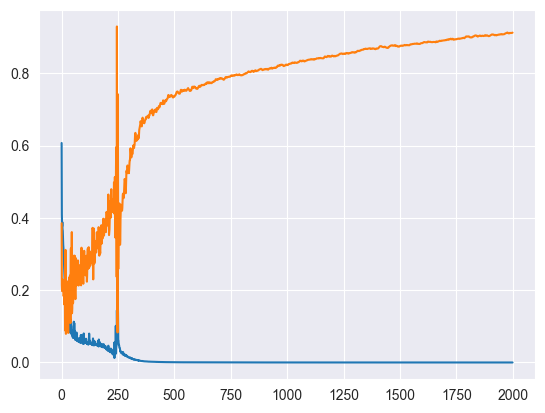

In [15]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [17]:
model2 = Sequential()

model2.add(Dense(128, input_dim=2, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1, activation='sigmoid'))

model2.summary

<bound method Model.summary of <Sequential name=sequential_5, built=True>>

In [18]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 4s 408us/step


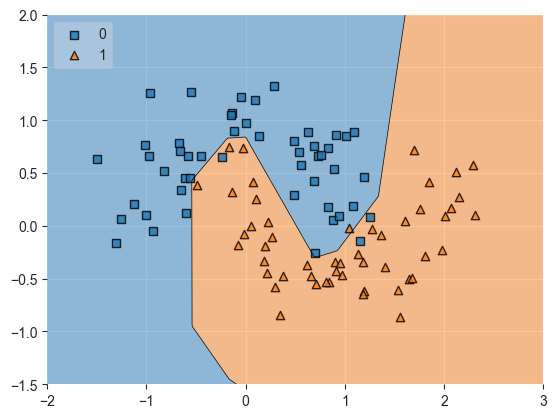

In [19]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

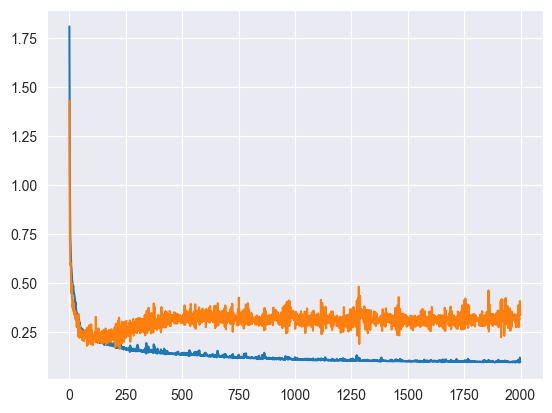

In [20]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [21]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

<Axes: >

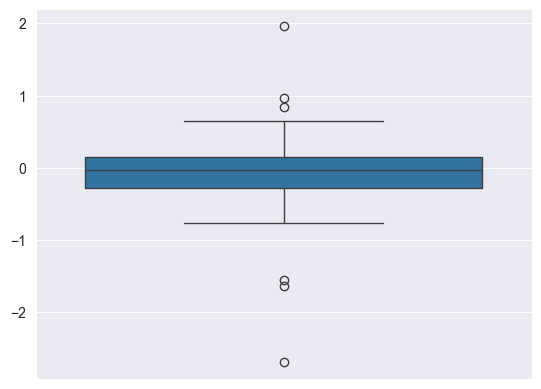

In [22]:
sns.boxplot(model1_weight_layer1)

<Axes: >

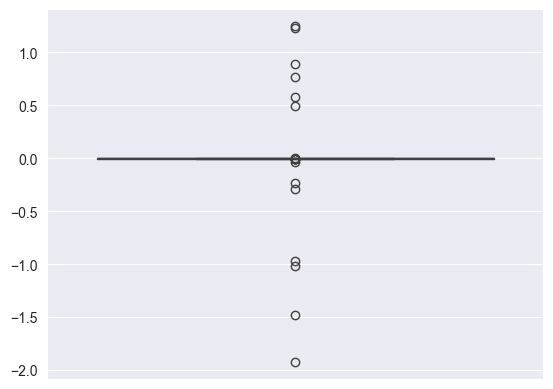

In [23]:
sns.boxplot(model2_weight_layer1)

In [24]:
model1_weight_layer1.min()

np.float32(-2.6890702)

In [25]:
model2_weight_layer1.min()

np.float32(-1.9228444)

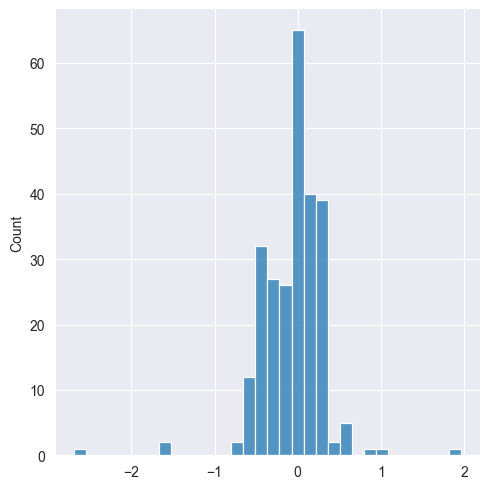

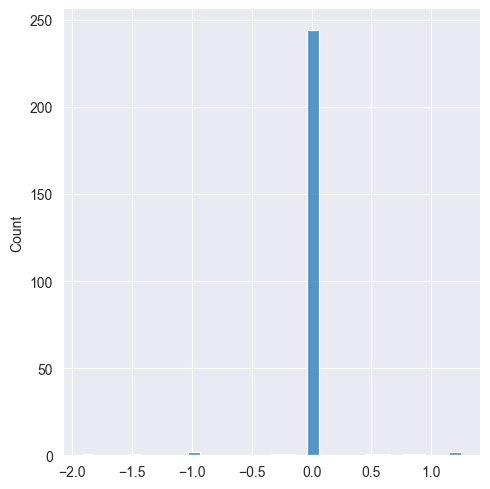

In [27]:
sns.displot(model1_weight_layer1)
sns.displot(model2_weight_layer1)

In [28]:
model1.get_weights()[0].reshape(256)


array([-4.14975584e-01, -5.21071926e-02, -1.39143109e-01,  2.40772843e-01,
       -1.05014712e-01, -4.41878200e-01, -4.43980873e-01, -3.91605318e-01,
       -5.67661166e-01,  2.60311291e-02,  2.64943063e-01, -4.75093983e-02,
       -3.53323877e-01, -4.18573730e-02,  2.71997064e-01, -4.59812850e-01,
        1.09977581e-01, -1.40009016e-01, -3.63764465e-02, -5.75112343e-01,
       -3.87708843e-01, -3.91270131e-01, -4.93862450e-01, -2.50388563e-01,
        3.02827388e-01, -2.46874318e-01, -5.15808225e-01, -7.51837641e-02,
       -3.63713235e-01, -4.96001273e-01, -6.03239894e-01, -6.81741862e-03,
       -5.03625274e-01,  6.03637882e-02, -3.64332557e-01, -5.02848476e-02,
       -2.79819250e-01, -2.78647691e-01,  1.68738514e-01,  1.68799996e-01,
        2.21848860e-01, -2.46025234e-01,  2.67400146e-01,  2.05530241e-01,
        2.63287812e-01,  4.49824363e-01, -6.56714618e-01, -5.06288648e-01,
        2.59589314e-01, -2.86625791e-02, -5.21365762e-01, -5.88943839e-01,
       -4.03072059e-01, -